In [21]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# Modelación y evaluación

In [3]:
#Leemos nuestros datos de entrenamiento
x = pd.read_csv('dataEntreno.csv')
x.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross,opening_gross,screens
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08,7.702548e+07,3452.000000
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07,1.769568e+07,2244.456101
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08,1.398022e+08,4362.000000
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08,7.040315e+07,3929.000000
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08,1.608873e+08,4404.000000


In [4]:
# Creamos nuestro target
y = x['worldwide_gross']

In [5]:
x = x.drop('worldwide_gross',axis=1)

In [7]:
x.head()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross,opening_gross,screens
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08,7.702548e+07,3452.000000
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07,1.769568e+07,2244.456101
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08,1.398022e+08,4362.000000
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08,7.040315e+07,3929.000000
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08,1.608873e+08,4404.000000


#### Modelo simple de regresión (lasso)


In [28]:
#Definimos nuestras variables de entrenamiento y de pruebas
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [29]:
print(len(x))
print(len(x_train))
print(len(x_test))

4104
2462
1642


In [30]:
x.head(2)

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1


In [31]:
model = Lasso()

In [32]:
#Iniciamos el entreno de nuestro modelo
model.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
#Predecimos con nuestros datos de prueba
predicted = model.predict(x_test)
predicted.shape

(1642,)

In [34]:
# Graficar en Jupyter
%matplotlib inline

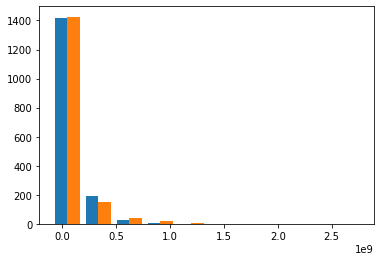

In [35]:
plt.hist([predicted,y_test]);